In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr
/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [4]:
train_labels = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv')
train_labels.tail()

,customer_ID,target
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1
458912,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0


In [5]:
train_labels['target'].value_counts()
#Biased Labels

0    340085
1    118828
Name: target, dtype: int64

In [6]:
df_train = pd.read_feather("../input/amexfeather/train_data.ftr") 
sample =  pd.read_csv("../input/amex-default-prediction/sample_submission.csv")
df_test=  pd.read_feather("../input/amexfeather/test_data.ftr")

In [7]:
df_train.shape

(5531451, 191)

In [8]:
ID=df_train['customer_ID'][1]
df_train[df_train['customer_ID']==ID]

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-08-04,0.945801,0.001746,0.007866,1.004883,0.004219,0.110962,0.009857,0.009865,...,NaN,NaN,0.001925,0.008598,0.004528,NaN,0.000674,0.002222,0.002884,0
6,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-09-18,0.940918,0.002182,0.018860,1.007812,0.004509,0.103333,0.006603,0.000783,...,NaN,NaN,0.001336,0.004360,0.009384,NaN,0.007729,0.007660,0.002224,0
7,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-10-08,0.914551,0.003029,0.014328,1.000000,0.000263,0.108093,0.009529,0.007835,...,NaN,NaN,0.002398,0.008453,0.005554,NaN,0.001831,0.009613,0.007385,0
8,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-11-20,0.950684,0.009895,0.016891,1.003906,0.001789,0.102783,0.002520,0.009819,...,NaN,NaN,0.009743,0.003967,0.007942,NaN,0.008720,0.004368,0.000996,0
9,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-12-04,0.868652,0.001082,0.001930,1.007812,0.001772,0.100464,0.004627,0.006073,...,NaN,NaN,0.003611,0.009605,0.007267,NaN,0.008766,0.004753,0.009071,0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 191 entries, customer_ID to target
dtypes: category(11), datetime64[ns](1), float16(177), int64(1), object(1)
memory usage: 2.0+ GB


In [10]:
#Null Values Check.
null= pd.DataFrame(df_train.isnull().sum(),columns=['null_count'])
null['percentage_of_null'] = round(((null['null_count']/len(df_train))*100) , 2)
null.sort_values(by='percentage_of_null',ascending=False)

,null_count,percentage_of_null
D_87,5527586,99.93
D_88,5525447,99.89
D_108,5502513,99.48
D_111,5500117,99.43
D_110,5500117,99.43
...,...,...
D_75,0,0.00
P_4,0,0.00
B_23,0,0.00
S_15,0,0.00


In [11]:
D = 0
S = 0
P = 0
B = 0
R = 0

for i in list(df_train.columns):
    if i.startswith("D_"):
        D+=1
    if i.startswith("S_"):
        S+=1
    if i.startswith("P_"):
        P+=1
    if i.startswith("B_"):
        B+=1
    if i.startswith("R_"):
        R+=1
        
print("No. of Delinquency Features  *** ",D)
print("No. of Spend Features        *** ",S)
print("No. of Payment Features      *** ",P)
print("No. of Balance Features      *** ",B)
print("No. of Risk Features         *** ",R)

No. of Delinquency Features  ***  96
No. of Spend Features        ***  22
No. of Payment Features      ***  3
No. of Balance Features      ***  40
No. of Risk Features         ***  28


**EDA**

Data is Imbalanced i.e. 75% is mapped to value 0 and remaining 25% is mapped to value 1

There are many variables which has null values greater than 99%

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

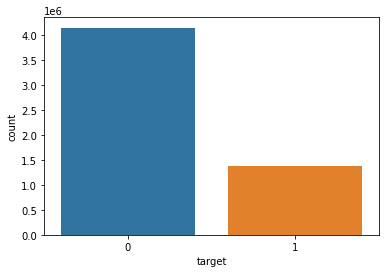

In [12]:
sns.countplot(df_train['target'])

<AxesSubplot:xlabel='percentage_of_null'>

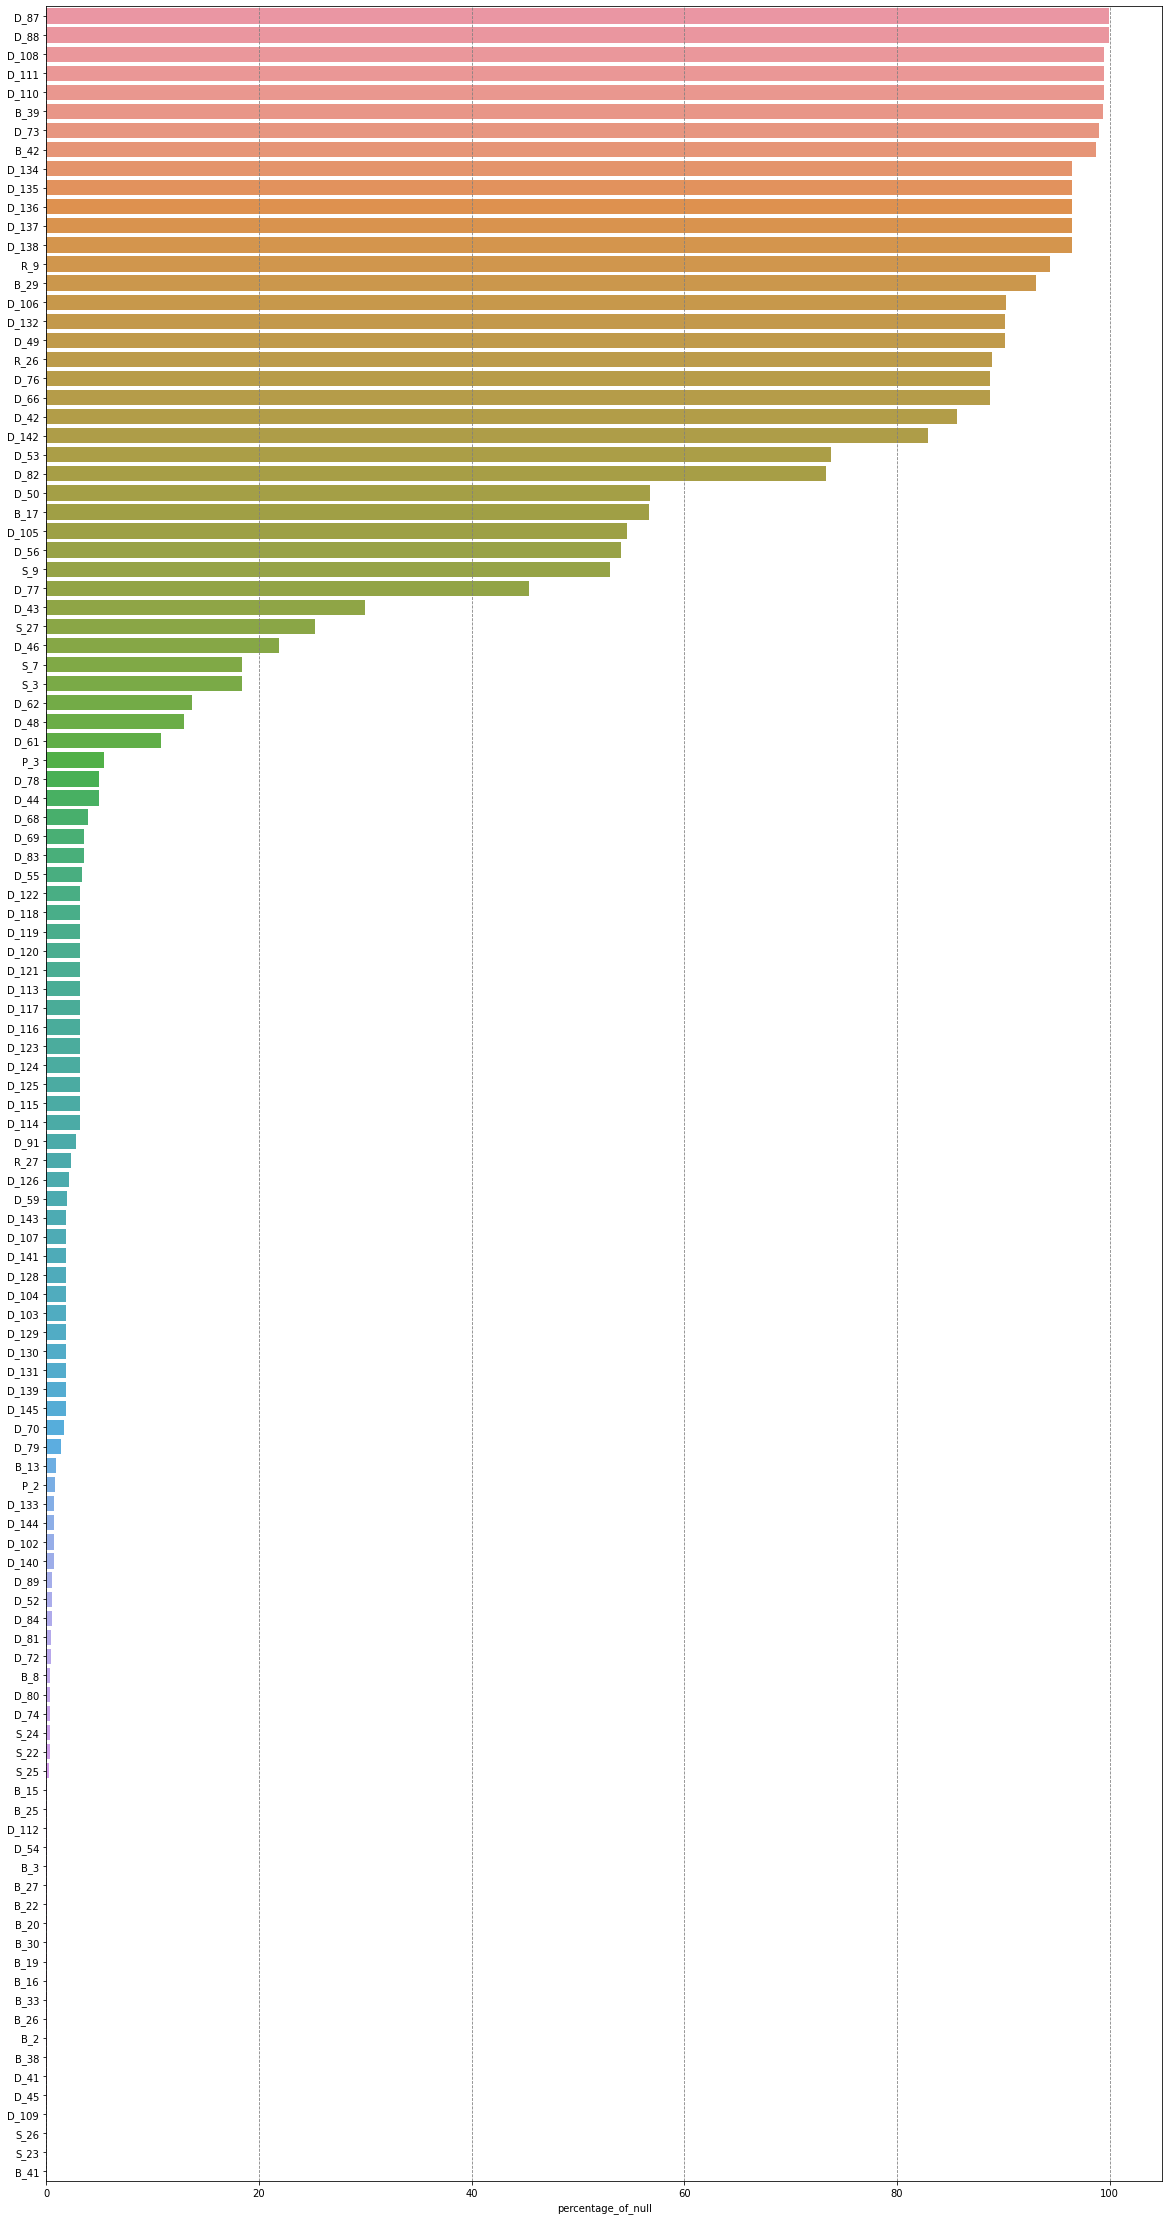

In [13]:
plt.figure(figsize=(20,40))
ax = plt.axes()
ax.grid(linestyle="--",axis='x',color='gray')

null = null[null['percentage_of_null']>0.0]
null=null.sort_values(by='percentage_of_null',ascending=False)
sns.barplot(data=null,y=null.index,x=null['percentage_of_null'])

Insights about customers
1) There are more than 350k customers who have 13 number of statments in training dataset

2) Last statement of customers in training dataset is in month of March 2018

3) For test Dataset , ther are more than 800k customers who have 13 number of statements

4) Last statment of customers in test dataset varies from March 2019 to October 2019

Add respective code afterwards

**Delinquency Variables**

In [14]:
#df_train.select_dtype(include=['object'])
df_cat=df_train.select_dtypes(include=['category']).columns
print(df_cat)
cat=list(filter(lambda x: x.startswith("D_"), df_cat))
cat

Index(['D_63', 'D_64', 'D_66', 'D_68', 'B_30', 'B_38', 'D_114', 'D_116',
       'D_117', 'D_120', 'D_126'],
      dtype='object')


['D_63', 'D_64', 'D_66', 'D_68', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']

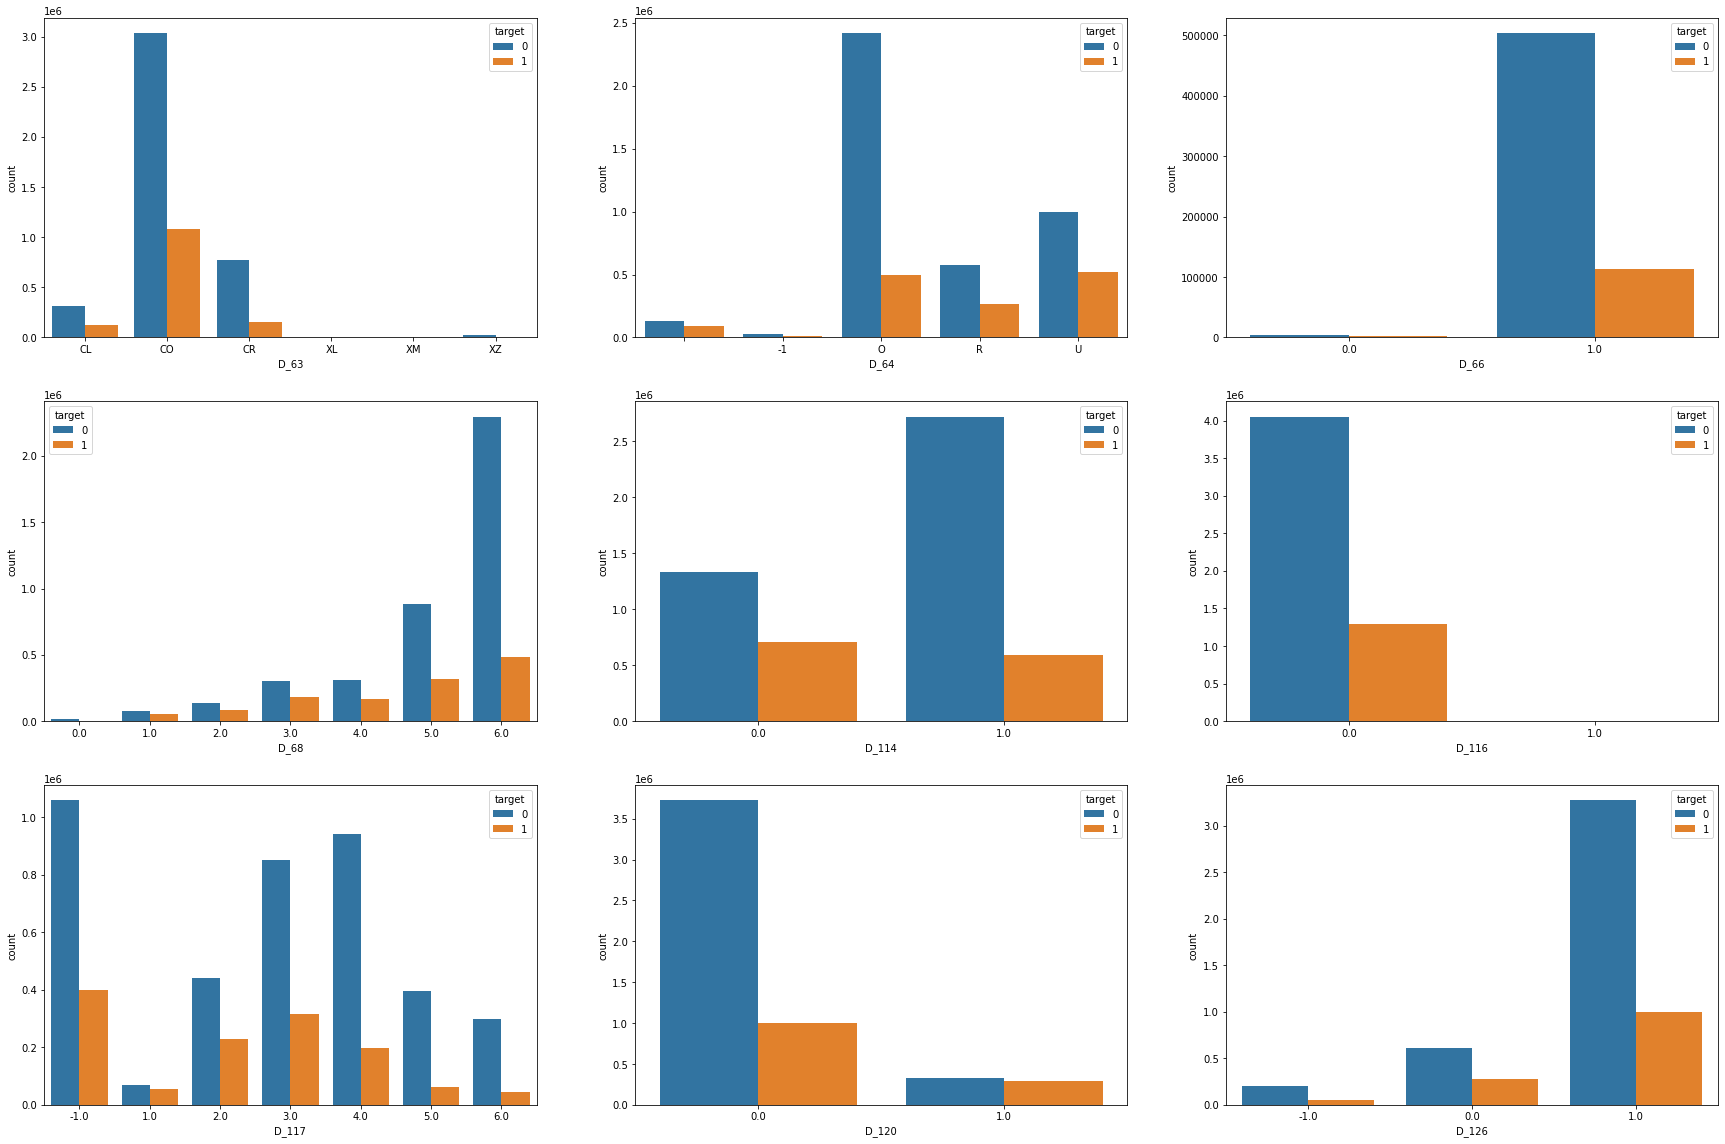

In [15]:
#Categorical Variable
plt.figure(figsize=(30,20))
i=1
for c in cat:
    plt.subplot(3,3,i)
    i+=1
    sns.countplot( x=df_train[c],hue=df_train['target'])

In [17]:
#Continuous Variable
df_train_Dcols =  [d for d in list(df_train.columns) if d.startswith("D_")]
df_train_Dcols = [i for i in df_train_Dcols if i not in cat ]
#len(df_train_Docs) = 87
'''
plt.figure(figsize=(90,35))
i=1
for c in df_train_Dcols:
    plt.subplot(13,7,i)
    i+=1
    sns.kdeplot( x=df_train[c],hue=df_train['target'])
'''

"\nplt.figure(figsize=(90,35))\ni=1\nfor c in df_train_Dcols:\n    plt.subplot(13,7,i)\n    i+=1\n    sns.kdeplot( x=df_train[c],hue=df_train['target'])\n"

In [18]:
#df_train_Ddata.corr().style.background_gradient(cmap='YlOrRd')
df_train[df_train_Dcols].corr().style.background_gradient(cmap='YlOrRd')

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


**Spend Variables**
1) There are 22 Spend Variabled

2) All 22 spend variables are continuous

3) Some Spend having correlation more than 0.90

In [19]:
#Continuous Variable
df_train_Scols =  [d for d in list(df_train.columns) if d.startswith("S_")]
df_train_Scols = [i for i in df_train_Scols if i not in df_cat ]
#len(df_train_Scols) = 87

'''
plt.figure(figsize=(90,35))
i=1
for c in df_train_Scols:
    plt.subplot(13,7,i)
    i+=1
    sns.kdeplot( x=df_train[c],hue=df_train['target'])
'''

"\nplt.figure(figsize=(90,35))\ni=1\nfor c in df_train_Scols:\n    plt.subplot(13,7,i)\n    i+=1\n    sns.kdeplot( x=df_train[c],hue=df_train['target'])\n"

In [20]:
df_train[df_train_Scols].corr().style.background_gradient(cmap='YlOrRd')

,S_3,S_5,S_6,S_7,S_8,S_9,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_27
S_3,1.000000,0.042644,0.034831,0.904635,-0.398599,0.050414,-0.157764,0.012428,-0.187421,0.471182,0.151974,0.079424,0.014147,0.025493,0.215683,0.016395,0.032143,0.014730,-0.089027,-0.068158,0.101080
S_5,0.042644,1.000000,-0.104881,0.061265,0.104402,0.055574,0.042499,0.047871,0.181801,-0.038455,0.030259,0.007051,0.150945,0.004420,0.026962,0.054042,0.011380,0.059965,-0.005514,0.087760,0.074385
S_6,0.034831,-0.104881,1.000000,0.004954,-0.456313,0.022458,-0.219033,-0.071999,-0.373059,0.294945,-0.022581,-0.063370,-0.073770,0.000853,-0.035803,-0.282211,-0.010390,-0.320747,0.101896,-0.073321,0.014248
S_7,0.904635,0.061265,0.004954,1.000000,-0.344958,0.039444,-0.129659,0.033806,-0.117206,0.415159,0.136932,0.077416,0.012553,0.022697,0.202676,0.030664,0.033973,0.029920,-0.082747,-0.058458,0.130211
S_8,-0.398599,0.104402,-0.456313,-0.344958,1.000000,-0.049113,0.361420,0.138643,0.695414,-0.786853,-0.002842,0.046853,0.089956,0.002584,-0.015033,0.234907,-0.013266,0.266635,0.075730,0.127265,0.165871
S_9,0.050414,0.055574,0.022458,0.039444,-0.049113,1.000000,-0.030124,-0.007602,-0.004141,0.050159,0.005188,-0.010764,0.118884,0.000897,0.011330,0.001789,0.005472,0.000696,-0.013679,0.010282,0.030229
S_11,-0.157764,0.042499,-0.219033,-0.129659,0.361420,-0.030124,1.000000,0.069011,0.480985,-0.316575,-0.000426,0.024229,0.089023,0.000824,-0.016606,0.095972,0.004464,0.111146,0.037729,0.142170,-0.020529
S_12,0.012428,0.047871,-0.071999,0.033806,0.138643,-0.007602,0.069011,1.000000,0.202563,-0.063361,0.010842,0.043256,0.037894,0.003643,0.004971,0.050257,0.000031,0.056184,0.013320,0.037446,0.068398
S_13,-0.187421,0.181801,-0.373059,-0.117206,0.695414,-0.004141,0.480985,0.202563,1.000000,-0.380495,0.019870,0.056919,0.169275,0.006750,0.000261,0.205074,-0.007069,0.229895,0.082254,0.196853,0.306803
S_15,0.471182,-0.038455,0.294945,0.415159,-0.786853,0.050159,-0.316575,-0.063361,-0.380495,1.000000,0.024070,-0.027143,-0.048030,0.000246,0.038380,-0.139496,0.017526,-0.161559,-0.071572,-0.079584,-0.025985


**Balance Variables**
1) There are 40 balance variables

2) Out of 40 , there are 38 variables which are continuous and remaining 2 are categorical

3) Some balance variables have correlation more than 0.90

In [21]:
print(df_cat)
cat1=list(filter(lambda x: x.startswith("B_"), df_cat))
cat1

Index(['D_63', 'D_64', 'D_66', 'D_68', 'B_30', 'B_38', 'D_114', 'D_116',
       'D_117', 'D_120', 'D_126'],
      dtype='object')


['B_30', 'B_38']

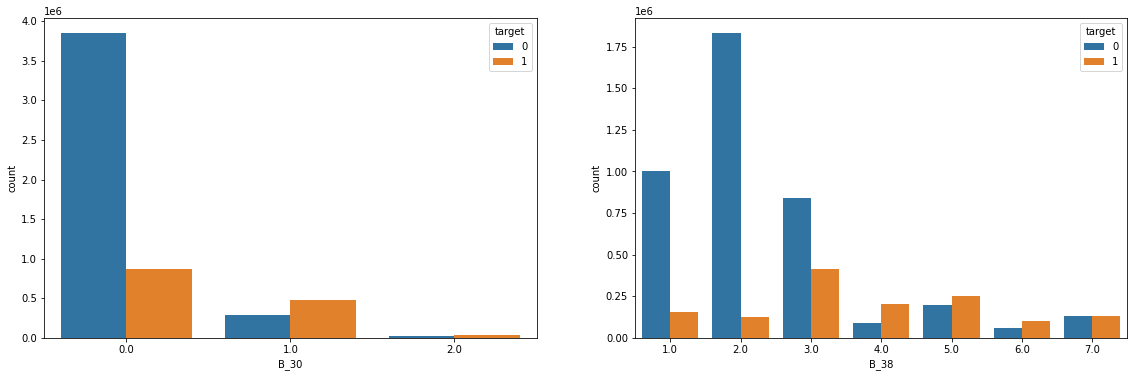

In [22]:
#Categorical Variable
plt.figure(figsize=(30,20))
i=1
for c in cat1:
    plt.subplot(3,3,i)
    i+=1
    sns.countplot( x=df_train[c],hue=df_train['target'])

In [23]:
#Continuous Variable
df_train_Bcols =  [d for d in list(df_train.columns) if d.startswith("B_")]
df_train_Bcols = [i for i in df_train_Bcols if i not in df_cat ]
#len(df_train_Bcols) = 38

'''
plt.figure(figsize=(90,35))
i=1
for c in df_train_Scols:
    plt.subplot(13,7,i)
    i+=1
    sns.kdeplot( x=df_train[c],hue=df_train['target'])
'''

"\nplt.figure(figsize=(90,35))\ni=1\nfor c in df_train_Scols:\n    plt.subplot(13,7,i)\n    i+=1\n    sns.kdeplot( x=df_train[c],hue=df_train['target'])\n"

In [24]:
df_train[df_train_Bcols].corr().style.background_gradient(cmap='YlOrRd')

,B_1,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_17,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,B_26,B_27,B_28,B_29,B_31,B_32,B_33,B_36,B_37,B_39,B_40,B_41,B_42
B_1,1.000000,-0.631075,0.729889,0.497810,-0.055300,-0.042160,0.633427,0.130491,0.543258,-0.020018,0.995574,-0.036642,-0.026937,0.232873,0.016615,0.585276,0.402008,-0.571484,0.715678,0.625322,0.102671,0.621643,0.635436,0.043381,0.525343,-0.003148,0.000007,0.343114,-0.004848,-0.029833,0.141661,-0.566514,0.078063,0.992915,-0.366870,0.012392,0.032785,-0.098336
B_2,-0.631075,1.000000,-0.713539,-0.510442,0.098170,0.057862,-0.591253,-0.205662,-0.613926,0.028597,-0.604082,0.053007,0.060700,-0.168381,-0.023018,-0.774867,-0.683953,0.849712,-0.628372,-0.788000,-0.074305,-0.640894,-0.584502,-0.052439,-0.356308,-0.032542,-0.002730,-0.331352,-0.056196,0.032391,-0.216870,0.912814,0.003659,-0.634588,0.014507,-0.014785,-0.051872,0.138958
B_3,0.729889,-0.713539,1.000000,0.548815,-0.052577,-0.047736,0.627605,0.095839,0.536883,-0.022088,0.718244,-0.032444,-0.038201,0.215651,0.057185,0.724134,0.469408,-0.652224,0.789322,0.764262,0.050277,0.750389,0.634765,0.054786,0.396393,0.010804,0.002228,0.385483,0.020823,-0.030691,0.251111,-0.638143,0.001285,0.733271,-0.027085,0.016039,0.041485,-0.112971
B_4,0.497810,-0.510442,0.548815,1.000000,0.004404,-0.055743,0.691608,0.084535,0.421208,-0.026117,0.496639,0.031892,0.042977,0.306679,0.172209,0.531455,0.328335,-0.656930,0.473743,0.547751,0.037202,0.496251,0.728607,0.055584,0.367123,0.037655,0.004104,0.728695,0.090765,-0.027425,0.135786,-0.484111,0.072940,0.494455,-0.197941,0.027544,0.039784,-0.112710
B_5,-0.055300,0.098170,-0.052577,0.004404,1.000000,0.009241,-0.089521,-0.077077,-0.049727,0.007571,-0.048059,0.578085,0.592558,0.441361,0.465823,-0.047759,-0.068695,0.064283,-0.065471,-0.051473,-0.010422,-0.044397,-0.082742,-0.019941,0.058802,0.086147,0.001372,0.251267,0.017768,0.009692,-0.025660,0.048792,0.001767,-0.055211,0.039948,-0.002324,-0.014862,0.163029
B_6,-0.042160,0.057862,-0.047736,-0.055743,0.009241,1.000000,-0.060999,-0.011408,-0.041805,0.028415,-0.040074,0.009229,0.015216,-0.011779,-0.002301,-0.061913,-0.068127,0.080398,-0.044663,-0.053697,-0.004478,-0.041058,-0.059382,-0.005272,-0.023424,-0.001233,-0.000665,-0.039951,-0.004885,0.002847,-0.014113,0.058905,-0.004175,-0.041915,0.162764,-0.001957,-0.004649,0.025962
B_7,0.633427,-0.591253,0.627605,0.691608,-0.089521,-0.060999,1.000000,0.123252,0.473465,-0.029522,0.614518,-0.055232,-0.066977,0.102250,-0.014782,0.557867,0.390543,-0.665188,0.621030,0.588741,0.062727,0.514241,0.995051,0.036861,0.278234,-0.008727,-0.000641,0.442727,-0.005067,-0.026903,0.204967,-0.517293,0.028066,0.632118,-0.283397,0.034862,0.028663,-0.130405
B_8,0.130491,-0.205662,0.095839,0.084535,-0.077077,-0.011408,0.123252,1.000000,0.280163,-0.001474,0.109262,-0.044092,-0.050213,-0.079754,-0.099722,0.106230,0.084865,-0.185509,0.147955,0.060847,0.053704,0.076534,0.103352,0.037391,0.023016,-0.013928,-0.000679,-0.068471,0.020583,-0.024530,0.027748,-0.188393,0.018925,0.128605,-0.025344,0.001510,0.043017,-0.073127
B_9,0.543258,-0.613926,0.536883,0.421208,-0.049727,-0.041805,0.473465,0.280163,1.000000,-0.018468,0.518056,-0.019716,-0.014325,0.159764,-0.041174,0.551222,0.394445,-0.574595,0.509774,0.543181,0.071257,0.481049,0.467078,0.089223,0.474079,-0.003832,0.000131,0.267571,0.029010,-0.048112,0.139551,-0.590101,0.067382,0.540130,-0.186473,0.012722,0.077595,-0.095300
B_10,-0.020018,0.028597,-0.022088,-0.026117,0.007571,0.028415,-0.029522,-0.001474,-0.018468,1.000000,-0.019031,0.006694,0.014318,-0.004139,0.000177,-0.027142,-0.041459,0.040696,-0.020145,-0.025206,-0.002345,-0.019450,-0.028570,-0.001394,-0.010302,-0.001107,-0.000477,-0.018577,-0.004421,0.001014,-0.006521,0.030209,-0.001068,-0.019974,0.049026,-0.000951,-0.001459,0.004418


**Risk Variables**
1) There are 28 Risk variables in which all are continuous

2) No Risk variables correlation is greater than 0.90

In [25]:
#Continuous Variable
df_train_Rcols =  [d for d in list(df_train.columns) if d.startswith("R_")]
df_train_Rcols = [i for i in df_train_Rcols if i not in df_cat ]
#len(df_train_Bcols) = 28

'''
plt.figure(figsize=(90,35))
i=1
for c in df_train_Scols:
    plt.subplot(13,7,i)
    i+=1
    sns.kdeplot( x=df_train[c],hue=df_train['target'])
'''

"\nplt.figure(figsize=(90,35))\ni=1\nfor c in df_train_Scols:\n    plt.subplot(13,7,i)\n    i+=1\n    sns.kdeplot( x=df_train[c],hue=df_train['target'])\n"

In [26]:
df_train[df_train_Rcols].corr().style.background_gradient(cmap='YlOrRd')

,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15,R_16,R_17,R_18,R_19,R_20,R_21,R_22,R_23,R_24,R_25,R_26,R_27,R_28
R_1,1.000000,0.637846,0.168084,0.629041,0.486149,0.307682,0.198454,0.435014,0.045405,0.579103,0.054828,-0.161736,0.298779,0.096957,0.479090,0.100940,0.225040,0.009670,0.217185,0.297230,0.357764,0.096057,0.027391,0.414458,0.134533,0.127380,-0.161825,0.040477
R_2,0.637846,1.000000,0.066792,0.778281,0.546804,0.395914,0.254146,0.517588,0.095305,0.189535,-0.010666,-0.131613,0.313388,0.134262,0.282497,0.019852,0.237175,0.013070,0.038081,0.400958,0.043969,0.038714,0.001202,0.563554,0.068600,0.098108,-0.117817,-0.002476
R_3,0.168084,0.066792,1.000000,0.054356,0.046527,0.027091,0.018199,0.048476,-0.053466,0.116834,0.262682,-0.056984,0.026313,0.004680,0.072349,0.502007,0.014252,0.000875,0.003350,0.023583,0.081862,0.008399,0.012030,0.037372,0.029837,0.142818,-0.246154,0.028678
R_4,0.629041,0.778281,0.054356,1.000000,0.672136,0.414462,0.326108,0.626703,0.033350,0.199040,-0.011835,-0.111595,0.391983,0.050918,0.283999,0.013061,0.297626,0.002656,0.037847,0.190915,0.041039,0.021496,0.000114,0.234099,0.060271,0.084946,-0.094912,-0.002310
R_5,0.486149,0.546804,0.046527,0.672136,1.000000,0.347772,0.248404,0.791508,0.016988,0.199836,-0.011085,-0.085601,0.686478,0.043648,0.274685,0.007766,0.529643,0.002382,0.039472,0.197163,0.030553,0.008478,0.001189,0.210066,0.046860,0.070961,-0.081498,-0.001400
R_6,0.307682,0.395914,0.027091,0.414462,0.347772,1.000000,0.593139,0.298840,0.024797,0.084012,-0.006310,-0.044360,0.212734,0.321064,0.124287,0.006448,0.178299,0.001812,0.026552,0.221983,0.020426,0.015952,-0.001121,0.258289,0.022757,0.045721,-0.042891,-0.000435
R_7,0.198454,0.254146,0.018199,0.326108,0.248404,0.593139,1.000000,0.232150,0.008192,0.053219,-0.004018,-0.042289,0.148684,0.024268,0.094445,0.003850,0.105008,0.000404,0.036018,0.038032,0.011411,0.009426,0.000349,0.051823,0.023738,0.029196,-0.020098,-0.000986
R_8,0.435014,0.517588,0.048476,0.626703,0.791508,0.298840,0.232150,1.000000,0.011218,0.211147,-0.006113,-0.076083,0.341555,0.023765,0.230985,0.009929,0.115482,0.002139,0.037361,0.090021,0.030722,0.012765,0.001197,0.117471,0.044743,0.058073,-0.071142,-0.001119
R_9,0.045405,0.095305,-0.053466,0.033350,0.016988,0.024797,0.008192,0.011218,1.000000,0.002085,-0.040928,-0.036515,0.013391,0.013716,-0.013969,-0.017391,0.012596,-0.002727,-0.008500,0.099250,-0.021701,0.019231,-0.003228,0.093773,0.018358,0.039839,-0.005664,-0.014843
R_10,0.579103,0.189535,0.116834,0.199040,0.199836,0.084012,0.053219,0.211147,0.002085,1.000000,0.032259,-0.079894,0.110487,0.017329,0.102660,0.050191,0.061250,-0.000083,0.083759,0.060631,0.063841,0.029384,0.005650,0.077558,0.044071,0.089587,-0.121105,0.000811


**Correlation between Target and Variables**

No variable is very much correlated to target

In [27]:
corr= pd.DataFrame(df_train.corrwith(df_train['target'],axis=0))
corr.style.background_gradient(cmap='YlOrRd')

,0
P_2,-0.610765
D_39,0.180007
B_1,0.389767
B_2,-0.483062
R_1,0.365000
S_3,0.323065
D_41,0.246780
B_3,0.429695
D_42,0.337734
D_43,0.283743


**Modelling**

 Reason for using LightGBM

  2.1) It can handle null values
  
  2.2) It is affected by high correlation between variables
  
  2.3) It can handle outliers 
  
  2.4) It is not affected by scale of features , so need to scale variables

In [28]:
from lightgbm import LGBMClassifier , early_stopping , log_evaluation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve , accuracy_score , roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [29]:
#Getting categorical columns
cat_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

#Getting continuous columns
cont_columns = [cols for cols in list(df_train.columns) if cols not in (cat_columns+['customer_ID','S_2','target'])]

In [34]:
#Training Data

# 1) Applied groupby on 'customer_ID' , to get each customer's data . Also applied mean , last , first , 
#min and max aggregation functions to add new features inside dataset

#df_cont_train = df_train.groupby('customer_ID')[cont_columns].agg(['mean','last','first'])
#df_cont_train.columns = ['_'.join(x) for x in df_cont_train.columns ] #Joining column names in tuple form for ex. ('P2','mean') ==> P2_mean
df_cont_train.reset_index(inplace=True)

# 2) Adding 'first' and 'last' lag feature and ratio feature
for col in df_cont_train.columns:
    #print('cols',col)
    if 'last' in col and col.replace('last','first') in df_cont_train:
        
        df_cont_train[col+'Diff_statement'] = df_cont_train[col]-df_cont_train[col.replace('last','first')]
        df_cont_train[col+'Diff_statement_ratio'] = df_cont_train[col]/df_cont_train[col.replace('last','first')]
        
        
cols_fl = [i for i in list(df_cont_train.columns) if df_cont_train[i].dtypes == 'float64']
cols_int = [i for i in list(df_cont_train.columns) if df_cont_train[i].dtypes == 'int64']

for col in cols_fl:
    df_cont_train[col] = df_cont_train[cols].astype(np.float32)
for col in cols_int:
    df_cont_train[col] = df_cont_train[cols].astype(np.float32)
    
    
# 3) For Categorical Columns
df_cat_train = df_train.groupby('customer_ID')[cat_columns].agg(['count','last'])

df_cat_train.columns = ['_'.join(x) for x in df_cat_train.columns ] #Same as above

df_cat_train.reset_index(inplace=True)


# 4) Merging continuous and categorical dataframes and train_labels
df_train = df_cont_train.merge(df_cat_train , how = 'inner' , on = 'customer_ID').merge(train_labels,how='inner',on='customer_ID')

del df_cat_train , df_cont_train  , train_labels #Deleting dataframe for memory optimization

gc.collect()

df_train.head()

In [45]:
df_train

,customer_ID,P_2_mean,P_2_last,P_2_first,D_39_mean,D_39_last,D_39_first,B_1_mean,B_1_last,B_1_first,...,D_126_last,D_63_count,D_63_last,D_64_count,D_64_last,D_66_count,D_66_last,D_68_count,D_68_last,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933594,0.934570,0.938477,0.010704,0.009117,0.001734,0.012009,0.009384,0.008728,...,1.0,13,CR,13,O,0,NaN,13,6.0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899902,0.880371,0.929199,0.215210,0.178101,0.382812,0.025650,0.034698,0.025787,...,1.0,13,CO,13,O,0,NaN,13,6.0,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878418,0.880859,0.876465,0.004181,0.009705,0.001469,0.004387,0.004284,0.001472,...,1.0,13,CO,13,R,0,NaN,13,6.0,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.599121,0.621582,0.567383,0.048859,0.001082,0.268555,0.059875,0.012566,0.070312,...,1.0,13,CO,13,O,0,NaN,13,3.0,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891602,0.872070,0.937012,0.004642,0.005573,0.006573,0.005939,0.007679,0.003433,...,1.0,13,CO,13,O,13,1.0,13,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0.848633,0.844238,0.859863,0.119202,0.447510,0.097717,0.029175,0.028519,0.006084,...,1.0,13,CO,13,U,13,1.0,13,6.0,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.859375,0.831055,0.863281,0.066406,0.033661,0.007328,0.368408,0.292480,0.431396,...,1.0,13,CO,13,R,0,NaN,13,6.0,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0.786621,0.800293,0.793945,0.221558,0.267090,0.536133,0.043030,0.020569,0.063904,...,1.0,13,CO,13,U,0,NaN,13,5.0,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0.804688,0.753906,0.856934,0.030884,0.008621,0.001748,0.018158,0.015839,0.003494,...,1.0,13,CO,13,U,0,NaN,13,3.0,1


In [41]:
df_cont_train['P_2_lastDiff_statement']

0        -0.003906
1        -0.048828
2         0.004395
3         0.054199
4        -0.064941
            ...   
458908   -0.015625
458909   -0.032227
458910    0.006348
458911   -0.103027
458912   -0.017090
Name: P_2_lastDiff_statement, Length: 458913, dtype: float16